<a href="https://colab.research.google.com/github/shazaelmorsh/Machine-Learning-Concepts/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#first step is to choose random centroids and assigning the points to the nearest centroids
def find_closest_centroids(X , centroids):
  K = centroids.shape[0]
  res = np.zeros(X.shape[0])
  idx = np.zeros(X.shape[0])
  # print(f"x is {X}")
  for i in range(X.shape[0]):
    distance = []
    for j in range(centroids.shape[0]):
      # print(f"X[i] - centroids[j] is {X[i] - centroids[j]}")
      norm_ij = np.linalg.norm(X[i] - centroids[j])
      # print(f"norm_ij is {norm_ij}")
      distance.append(norm_ij)
    idx[i] = np.argmin(distance)
  return idx

In [ ]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])
np.random.seed(42)  # For reproducibility
X = np.random.rand(10, 2) * 10  # Random numbers between 0 and 10
# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

In [ ]:
#second part of the algo is to calcalate the new centroids through the mean
def calculate_centroids(X , idx, K):
  m,n= X.shape
  centroids = np.zeros((K, 2))
  for k in range(K):
    points = X[idx == k]
    centroids[k] =np.mean(points)
  return centroids


In [ ]:
K = 3
centroids = calculate_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[3.45347465 3.45347465]
 [5.22390876 5.22390876]
 [6.60849073 6.60849073]]


# Anomaly Detection

##Imports and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X_train = np.array(
    [[13.04681517, 14.74115241],
 [13.40852019 ,13.7632696 ],
 [14.19591481 ,15.85318113],
 [14.91470077 ,16.17425987],
 [13.57669961, 14.04284944],
 [13.92240251 ,13.40646894],
 [12.82213164 ,14.22318782],
 [15.67636615 ,15.89169137],
 [16.16287532 ,16.20299807],
 [12.66645095 ,14.89908374],
 [13.98454962 ,12.95800822],
 [14.06146043 ,14.54908874],
 [13.38988671 ,15.56202142],
 [13.39350475 ,15.62698794],
 [13.97900926 ,13.28061494],
 [14.16791259 ,14.46583829],
 [13.96176145 ,14.75182421],
 [14.45899735 ,15.07018563],
 [14.58476372 ,15.82743424],
 [12.07427074 ,13.0671109 ]])
X_val =np.array([[15.79025979 ,14.9210243 ],
 [13.63961877, 15.32995521],
 [14.86589943, 16.47386514],
 [13.58467605, 13.98930611],
 [13.46404167, 15.63533011],
 [12.94888838, 16.14006828],
 [15.31084155, 15.17480137],
 [13.89795241, 15.43169469],
 [11.92096525, 14.30579937],
 [14.85934119, 14.90066474],
 [13.63501268, 14.5620583 ],
 [15.75981741 ,15.13340409],
 [15.221965   ,14.18491044],
 [12.10564111 ,13.42653822],
 [14.80848889 ,13.87075725],
 [15.36135887 ,15.99014917],
 [12.72914442 ,15.8265107 ],
 [15.38533789 ,15.21036416],
 [13.81810534 ,14.29933915],
 [15.3788488  ,15.90228514]])
y_val = np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])

##Visualization

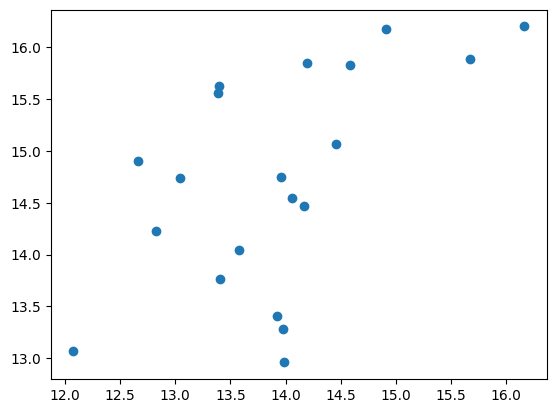

In [5]:
plt.scatter(X_train[:,0],X_train[:,1])

##Gausian distribution

we want to estimate gausian distribution for each feature $x_i$.
the Gaussian distribution is given by

   $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$

   where $\mu$ is the mean and $\sigma^2$ controls the variance.
   
* For each feature $i = 1\ldots n$, you need to find parameters $\mu_i$ and $\sigma_i^2$ that fit the data in the $i$-th dimension $\{x_i^{(1)}, ..., x_i^{(m)}\}$ (the $i$-th dimension of each example).

You can estimate the parameters, ($\mu_i$, $\sigma_i^2$), of the $i$-th
feature by using the following equations. To estimate the mean, you will
use:

$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$

In [7]:
def estimate_gaussion(X):
  m = X.shape[0]
  mu = 1/ m * np.sum(X , axis = 0)
  var = 1 / m * np.sum((X - mu) ** 2, axis = 0)
  return mu, var
mu, var = estimate_gaussion(X_train)

print("Mean of each feature:", mu)
print("Variance of each feature:", var)



Mean of each feature: [13.92244969 14.71786285]
Variance of each feature: [0.8943801  1.06167853]
